# `Latar Belakang`

Perusahaan supermarket merupakan salah satu bisnis ritel yang penting dalam industri perdagangan. Sebagai pemain di pasar yang kompetitif, supermarket bertujuan untuk meningkatkan penjualan guna mempertahankan dan meningkatkan pangsa pasar mereka. Salah satu indikator utama kinerja penjualan adalah total pengeluaran pelanggan (total spent customer), yang mencerminkan seberapa banyak pelanggan menghabiskan uang di supermarket.

Supermarket X sedang menghadapi tantangan dalam meningkatkan penjualan mereka. Mereka mengalami penurunan penjualan tiap tahunnya, yang dapat memiliki dampak negatif pada pertumbuhan perusahaan dan keberlanjutan bisnis. Salah satu pendekatan yang dapat diambil oleh supermarket adalah untuk fokus pada peningkatan total pengeluaran pelanggan. Jika mereka dapat meningkatkan jumlah uang yang dihabiskan oleh setiap pelanggan saat berbelanja, ini dapat berdampak positif pada penjualan keseluruhan. 

# `Problem`
Supermarket X ingin `meningkatkan penjualan yang didasarkan pada total spent customer` dengan menganalisis faktor penyebab penurunan penjualan. Diharapkan dari analisis tersebut menghasilkan sebuah rekomendasi untuk memperbaiki masalah yang ada.

Berikut rumusan masalah yang dibutuhkan untuk menganalisis problem:
1. Bagaimana hubungan karakteristik demografis konsumen terhadap jumlah pengeluaran mereka? 
2. Apa produk atau kategori produk yang paling diminati oleh customer dengan avg total purchase tertinggi? 
3. Bagaimana faktor tersebut dapat membantu dalam mengembangkan strategi pemasaran yang lebih efektif untuk mendorong pembelian yang lebih tinggi?
4. Apakah ada tren yang dapat diidentifikasi di antara campaign?
5. Berapa kali campaign dilakukan untuk mencapai keefektifan campaign?

					


# `Library` 

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import phik
from scipy.stats import shapiro

# File

In [2]:
df = pd.read_csv("F:\Capstone-Project-2\Data\Supermarket Customers Clean.csv")
pd.set_option("display.max_columns", None)
display(df.head(), df.tail())

,ID,Year_Birth,Age,Age_Category,Education,Marital_Status,Income,Income_Category,Kidhome,Teenhome,Child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Accepted_Cmp,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957.0,57.0,Retirement,Graduate,Single,58138,Middle Income,0,0,No,2012-09-04,58,0,635,88,546,172,88,88,1617,3,0,0,0,0,0,No,1,8,10,4,7
1,2174,1954.0,60.0,Retirement,Graduate,Single,46344,Middle Income,1,1,Yes,2014-03-08,38,0,11,1,6,2,1,6,27,2,0,0,0,0,0,No,0,1,1,2,5
2,4141,1965.0,49.0,Pre-retirement,Graduate,Relationship,71613,Upper Income,0,0,No,2013-08-21,26,0,426,49,127,111,21,42,776,1,0,0,0,0,0,No,0,8,2,10,4
3,6182,1984.0,30.0,Early worker,Graduate,Relationship,26646,Low Income,1,0,Yes,2014-02-10,26,0,11,4,20,10,3,5,53,2,0,0,0,0,0,No,0,2,0,4,6
4,5324,1981.0,33.0,Early worker,Postgraduate,Relationship,58293,Middle Income,1,0,Yes,2014-01-19,94,0,173,43,118,46,27,15,422,5,0,0,0,0,0,No,0,5,3,6,5


,ID,Year_Birth,Age,Age_Category,Education,Marital_Status,Income,Income_Category,Kidhome,Teenhome,Child,Dt_Customer,Recency,Complain,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,Total_Purchases,NumDealsPurchases,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,Accepted_Cmp,Response,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
2235,10870,1967.0,47.0,Pre-retirement,Graduate,Relationship,61223,Middle Income,0,1,Yes,2013-06-13,46,0,709,43,182,42,118,247,1341,2,0,0,0,0,0,No,0,9,3,4,5
2236,4001,1946.0,68.0,Elderly,Postgraduate,Relationship,64014,Middle Income,2,1,Yes,2014-06-10,56,0,406,0,30,0,0,8,444,7,1,0,0,0,0,Yes,0,8,2,5,7
2237,7270,1981.0,33.0,Early worker,Graduate,Single,56981,Middle Income,0,0,No,2014-01-25,91,0,908,48,217,32,12,24,1241,1,0,0,0,1,0,Yes,0,2,3,13,6
2238,8235,1956.0,58.0,Retirement,Postgraduate,Relationship,69245,Upper Income,0,1,Yes,2014-01-24,8,0,428,30,214,80,30,61,843,2,0,0,0,0,0,No,0,6,5,10,3
2239,9405,1954.0,60.0,Retirement,Postgraduate,Relationship,52869,Middle Income,1,1,Yes,2012-10-15,40,0,84,3,61,2,1,21,172,3,0,0,0,0,0,No,1,3,1,4,7


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   float64
 2   Age                  2240 non-null   float64
 3   Age_Category         2240 non-null   object 
 4   Education            2240 non-null   object 
 5   Marital_Status       2240 non-null   object 
 6   Income               2240 non-null   int64  
 7   Income_Category      2240 non-null   object 
 8   Kidhome              2240 non-null   int64  
 9   Teenhome             2240 non-null   int64  
 10  Child                2240 non-null   object 
 11  Dt_Customer          2240 non-null   object 
 12  Recency              2240 non-null   int64  
 13  Complain             2240 non-null   int64  
 14  MntWines             2240 non-null   int64  
 15  MntFruits            2240 non-null   i

In [4]:
# Converting data type of Date Regristation Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%Y-%m-%d')

# Data Analysis

## Dasar penentuan problem dan pembuktian latar belakang:

- Untuk mengeathui apakah terdapat penurunan penjualan per tahun (didasakan pada Total Purchases)

Bar Plot\
`Tujuan` : Untuk mengetahui perubahan atau perbedaan antar avg total purchase per tahun yang akan digunakan sebagai bahan evaluasi penjualan supermarket X

1. Rata rata total purchase by Year

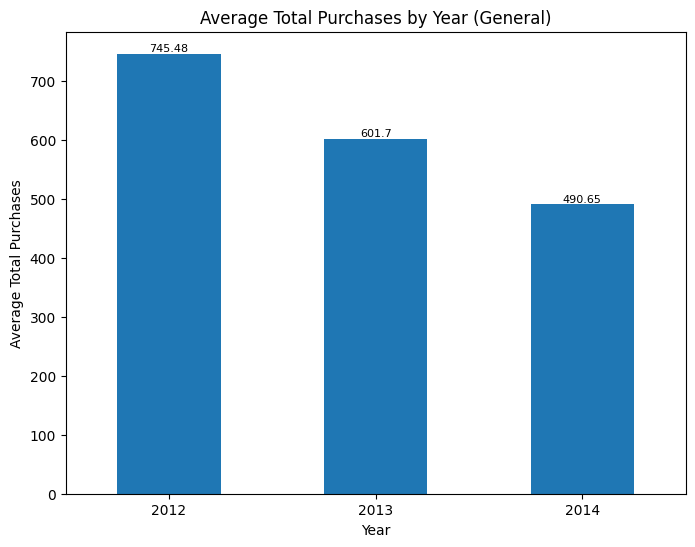

In [5]:
import matplotlib.pyplot as plt

df['year'] = df['Dt_Customer'].dt.year
df_grouped = df.groupby('year')['Total_Purchases'].mean()

fig, ax = plt.subplots(figsize=(8, 6))  # Ubah ukuran gambar di sini

ax = df_grouped.plot.bar(x='year', y='Total_Purchases')
ax.set_title('Average Total Purchases by Year (General)')
ax.set_xlabel('Year')
ax.set_ylabel('Average Total Purchases')
plt.xticks(rotation=0)

for i, v in enumerate(df_grouped.values):
    ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize = 8)

plt.show()

Insight:
- Dari bar plot diatas dapat disimpulkan bahwa dari tahun 2012, 2013 dan 2014 secara keseluruhan terdapat penurunan akan rata rata total purchase per customer

2. Rata rata total purchase per year (accepted_cmp = yes)

In [6]:
# Mengambil data Total_purchase yang hanya pada tahun 2013
data_2012_acc = df[(df['Dt_Customer'].dt.year == 2012) & (df['Accepted_Cmp'] == 'Yes')]['Total_Purchases']
data_2013_acc = df[(df['Dt_Customer'].dt.year == 2013) & (df['Accepted_Cmp'] == 'Yes')]['Total_Purchases']
data_2014_acc = df[(df['Dt_Customer'].dt.year == 2014) & (df['Accepted_Cmp'] == 'Yes')]['Total_Purchases']

data_2012_acc
data_2013_acc
data_2014_acc


9         49
53      1617
67      1274
87       372
88      1366
        ... 
2187    1566
2207      54
2224     679
2236     444
2237    1241
Name: Total_Purchases, Length: 131, dtype: int64

C:\Users\KHANZA\AppData\Local\Temp\ipykernel_23892\3251397622.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['year'] = df_filtered['Dt_Customer'].dt.year


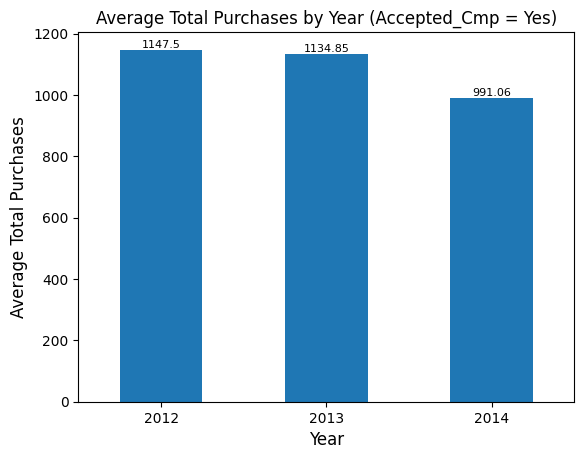

In [7]:
import matplotlib.pyplot as plt

# Filter the data based on acc_cmp = 'yes'
df_filtered = df[df['Accepted_Cmp'] == 'Yes']

# Extract the year from Dt_Customer column
df_filtered['year'] = df_filtered['Dt_Customer'].dt.year

# Group by year and calculate the mean of Total_Purchases
df_grouped = df_filtered.groupby('year')['Total_Purchases'].mean()

# Check if the DataFrame is empty
if df_grouped.empty:
    print("No data available for plotting.")
else:
    # Plot the bar chart
    ax = df_grouped.plot.bar(x='year', y='Total_Purchases')
    ax.set_title('Average Total Purchases by Year (Accepted_Cmp = Yes)', fontsize = 12)
    ax.set_xlabel('Year', fontsize = 12)
    ax.set_ylabel('Average Total Purchases', fontsize = 12)
    plt.xticks(rotation=0)

    # Add the values on top of the bars
    for i, v in enumerate(df_grouped.values):
        ax.text(i, v, str(round(v, 2)), ha='center', va='bottom', fontsize = 8)

    plt.show()

Insight:\
Rata-rata total purchase untuk customer yang accepted campign per tahun dapat kita lihat bahwa terjadi penurunan. 

### Membuktikan pernyataan diatas maka

##### Check Distribusi Total Purchases per tahun

In [8]:
# Mengambil data Total_purchase yang hanya pada tahun 2013
data_2012 = df[df['Dt_Customer'].dt.year == 2012]['Total_Purchases']
data_2013 = df[df['Dt_Customer'].dt.year == 2013]['Total_Purchases']
data_2014 = df[df['Dt_Customer'].dt.year == 2014]['Total_Purchases']

data_2012
data_2013
data_2014


1         27
3         53
4        422
9         49
23       544
        ... 
2224     679
2229      50
2236     444
2237    1241
2238     843
Name: Total_Purchases, Length: 557, dtype: int64

##### Tahun 2012

In [9]:
from scipy.stats import shapiro
# Melakukan uji Shapiro-Wilk
statistic, p_value = shapiro(data_2012)

# Menampilkan hasil
print("Statistic:", statistic)
print("P-value:", p_value)

# Membuat keputusan berdasarkan p-value
alpha = 0.05
if p_value > alpha:
    print("Data distribusi normal")
else:
    print("Data tidak distribusi normal")

Statistic: 0.9042304158210754
P-value: 4.52613676639336e-17
Data tidak distribusi normal


##### Tahun 2013

In [10]:
from scipy.stats import shapiro
# Melakukan uji Shapiro-Wilk
statistic, p_value = shapiro(data_2013)

# Menampilkan hasil
print("Statistic:", statistic)
print("P-value:", p_value)

# Membuat keputusan berdasarkan p-value
alpha = 0.05
if p_value > alpha:
    print("Data distribusi normal")
else:
    print("Data tidak distribusi normal")

Statistic: 0.8697744607925415
P-value: 2.4370559529835332e-30
Data tidak distribusi normal


##### Tahun 2014

In [11]:
from scipy.stats import shapiro
# Melakukan uji Shapiro-Wilk
statistic, p_value = shapiro(data_2014)

# Menampilkan hasil
print("Statistic:", statistic)
print("P-value:", p_value)

# Membuat keputusan berdasarkan p-value
alpha = 0.05
if p_value > alpha:
    print("Data distribusi normal")
else:
    print("Data tidak distribusi normal")

Statistic: 0.8028785586357117
P-value: 1.760541681081674e-25
Data tidak distribusi normal


Insight Karena dari tahun 2012 - 2014 termasuk data yang tidak normal maka menggunakan uji statistic Kruskal untuk menguji hipotesis.

##### `Hipotesis`
H0 = Tidak ada perbedaan yang siginifikan pada rata rata total purchase customer per tahun\
H1 = Ada perbedaan signifikan pada rata rata total purchase customer per tahun

In [12]:
from scipy.stats import kruskal

# Melakukan uji Kruskal-Wallis
statistic, p_value = kruskal(data_2012, data_2013, data_2014)

# Menampilkan hasil
print("Statistic:", statistic)
print("P-value:", p_value)

# Membuat keputusan berdasarkan p-value
alpha = 0.05
if p_value > alpha:
    print("H0 diterima")
else:
    print("Menolak H0")


Statistic: 63.646191680138486
P-value: 1.5114893086088562e-14
Menolak H0


In [13]:
data_2012

0       1617
6        590
11        61
14        46
15      1315
        ... 
2225     586
2228    1679
2231    1049
2232      22
2239     172
Name: Total_Purchases, Length: 494, dtype: int64

##### Check Confidance Interval

confidance interval:
orang" rerata total spent di tahun 2012 ada dirange ... sampai ... 

Tahun 2012

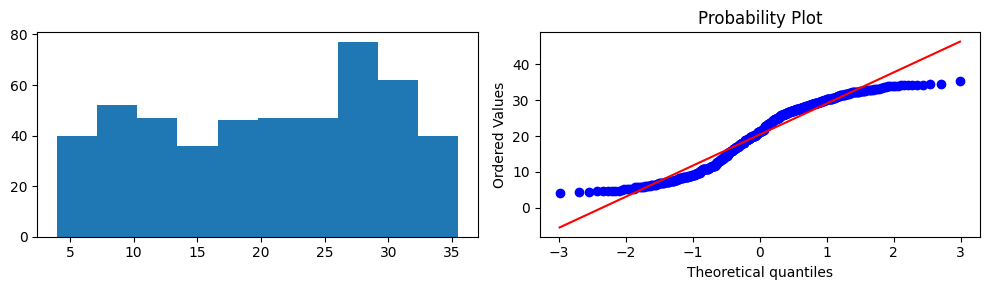

In [14]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# generate non-normal sample

xt, lmbda = stats.boxcox(data_2012)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

In [15]:
data_2012.describe()

count     494.000000
mean      745.483806
std       636.294396
min        13.000000
25%       126.750000
50%       578.500000
75%      1240.750000
max      2352.000000
Name: Total_Purchases, dtype: float64

In [16]:
import numpy as np
from scipy import stats

# 95% confidence interval of mean in a transformed scale
lo_xt, hi_xt = stats.t.interval(1 - 0.05, len(xt) - 1, loc=np.mean(xt), scale=stats.sem(xt))
(lo_xt, hi_xt)

(19.65454480556885, 21.227697965182397)

In [17]:
from scipy.special import inv_boxcox

# inverse transform
lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)
(lo_x, hi_x)

(465.72228543114863, 571.9141790680521)

Tahun 2013

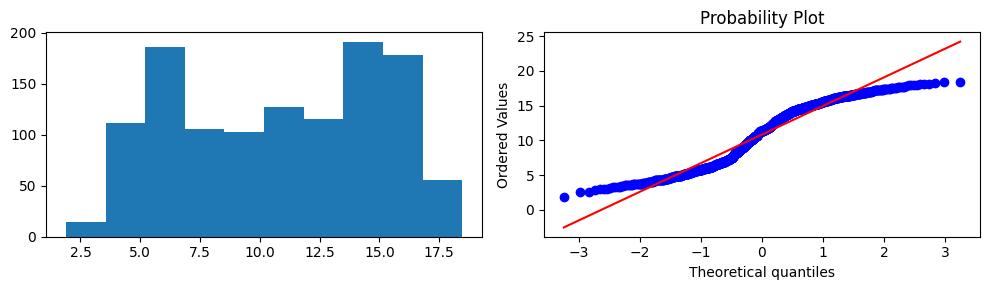

In [18]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# generate non-normal sample

xt, lmbda = stats.boxcox(data_2013)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

In [19]:
import numpy as np
from scipy import stats

# 95% confidence interval of mean in a transformed scale
lo_xt, hi_xt = stats.t.interval(1 - 0.05, len(xt) - 1, loc=np.mean(xt), scale=stats.sem(xt))
(lo_xt, hi_xt)

(10.605895473542299, 11.087531984813333)

In [20]:
from scipy.special import inv_boxcox

# inverse transform
lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)
(lo_x, hi_x)

(315.14933880184884, 367.9150756379232)

Tahun 2014

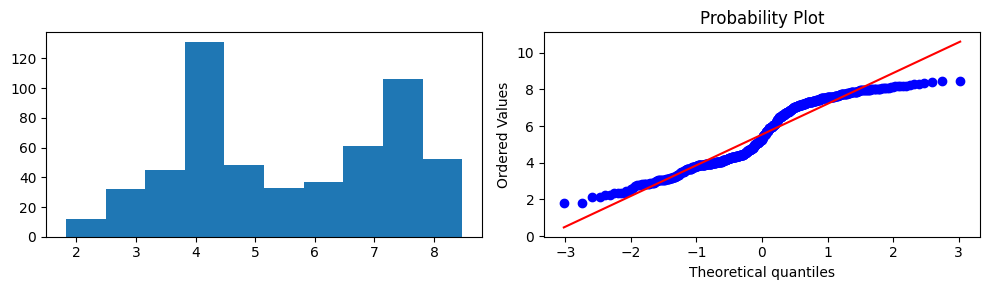

In [21]:
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# generate non-normal sample

xt, lmbda = stats.boxcox(data_2014)

# plot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
axes[0].hist(xt)
stats.probplot(xt, dist=stats.norm, plot=axes[1])
fig.tight_layout()

In [22]:
import numpy as np
from scipy import stats

# 95% confidence interval of mean in a transformed scale
lo_xt, hi_xt = stats.t.interval(1 - 0.05, len(xt) - 1, loc=np.mean(xt), scale=stats.sem(xt))
(lo_xt, hi_xt)

(5.39402958575892, 5.681422306567287)

In [23]:
from scipy.special import inv_boxcox

# inverse transform
lo_x, hi_x = inv_boxcox(lo_xt, lmbda), inv_boxcox(hi_xt, lmbda)
(lo_x, hi_x)

(168.26906837418449, 218.02705852841385)

Kesimpulan:
- Dilihat dari chart `Average Total Purchases by Year` dan `Average Total Purchases by Year (Accepted_Cmp = Yes)` dapat dikatakan bahwa terdapat penurunan total purchases customer per tahunnya. Pernyataan tersebut diperkuat dengan dilakukan uji kruskal pada tahun 2012, 2013, dan 2014 yang menyatakan bahwa terdapat perbedaan signifikan pada rata rata total purchase customer per tahun. Untuk mengukur perbedaan siginifikan antara rerata total purcahses per tahunnaya dilalukan pengecekan terhadap confidance interval, confidence interval pada tahun 2012 memiliki rentang nilai yang lebih tinggi jika dibandingkan dengan tahun 2013 dan 2014. Pada tahun 2013 memilki rentang nilai yang lebih kecil dari tahun 2012 tetapi lebih besar dari 2014, sedangkan untuk tahun 2014 memilki rentang nilai lebih kecil dari tahun 2012 dan 2013.

- Dari penjelasan di atas, dapat disimpulkan bahwa terdapat faktor-faktor yang menyebabkan penurunan total pembelian pelanggan setiap tahun di Supermarket X. Salah satu penyebab penurunan tersebut adalah ketidak efektifnya campaign yang dilakukan oleh supermarket X. Penyebab penurunan ini diperkuat bahwa Supermarket X memiliki tujuan dalam melaksanakan campaign tersebut untuk meningkatkan penjualan berdasarkan total pembelian pelanggan.

## Faktor yang menyebabkan Campaign Tidak Efektif

#### 1. Target Pasar

Alasan target pasar dapat mempengaruhi efektifitas campaign:

 jika perusahaan tidak memahami target pasar dengan baik, campaign yang dijalankan oleh perusahaan dapat gagal dalam menarik perhatian dan memotivasi pembelian. Campaign yang tidak menarik bagi target pasar dapat mengakibatkan kurangnya respons dari pelanggan dan berdampak pada berkurangnya potensi penjualan dan total pengeluaran pelanggan dapat mengalami penurunan. Oleh karena itu, target pasar mempengaruhi campaign dalam merancang dan melaksanakan campaign yang efektif, yang berdampak positif pada hasil penjualan dan total pengeluaran pelanggan.

### Mencari target pasar pada supermarket X
#### 1. Bagaimana hubungan karakteristik demografis konsumen terhadap jumlah pengeluaran mereka? 

**Using Metrics: Demographic Segmentation (Age, Income, Education, marital status, child)**

**Check Correlation:**

Correlation with Domain knowledge:

faktor demografis Age, Income, Education, marital status, dan child ownership dapat mempengaruhi sejauh mana konsumen cenderung menghabiskan uang dalam pembelian produk. 

Karena dengan memahami karakteristik demografis konsumen, perusahaan dapat melakukan segmentasi pasar yang lebih baik. Berdasarkan faktor-faktor demografis ini, perusahaan dapat mengidentifikasi target pasar yang memiliki kecenderungan pengeluaran serupa. Hal ini memungkinkan perusahaan untuk mengembangkan strategi pemasaran yang lebih efektif dan menyesuaikan produk dan penawaran dengan preferensi dan kebutuhan khusus dari masing-masing segmen.

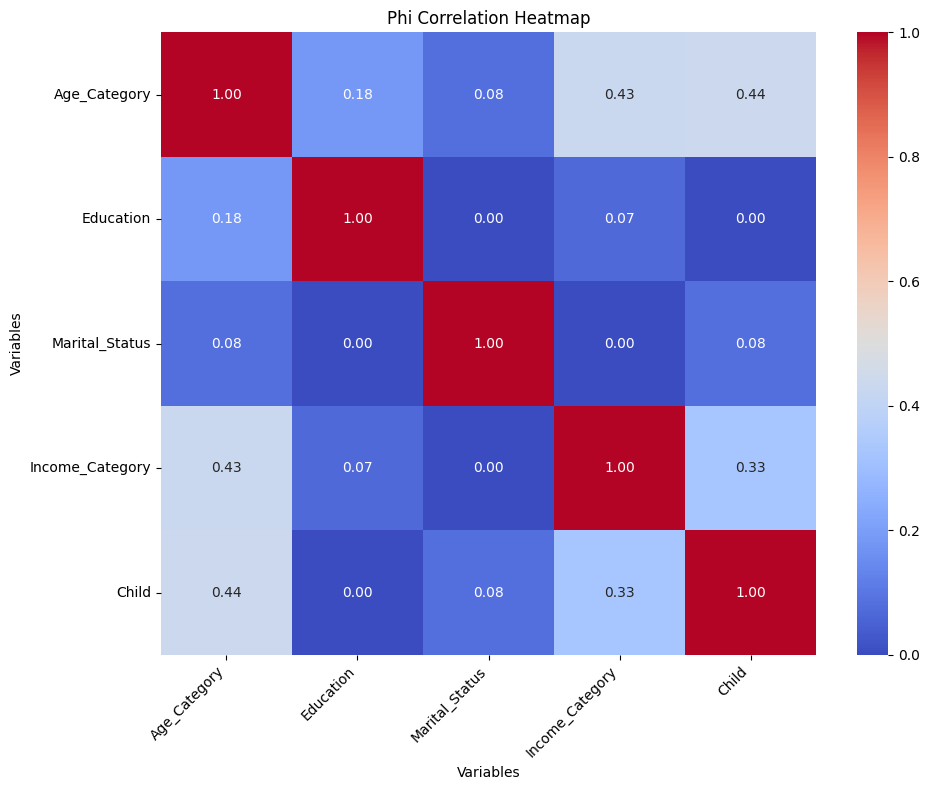

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from phik import phik_matrix

# Menghitung matriks korelasi Phi
phi_matrix = phik_matrix(df[['Age_Category', 'Education', 'Marital_Status', 'Income_Category', 'Child']])

# Menampilkan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(phi_matrix, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Phi Correlation Heatmap')
plt.xlabel('Variables')
plt.ylabel('Variables')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Check the Target Market that accepted the campaign:** 

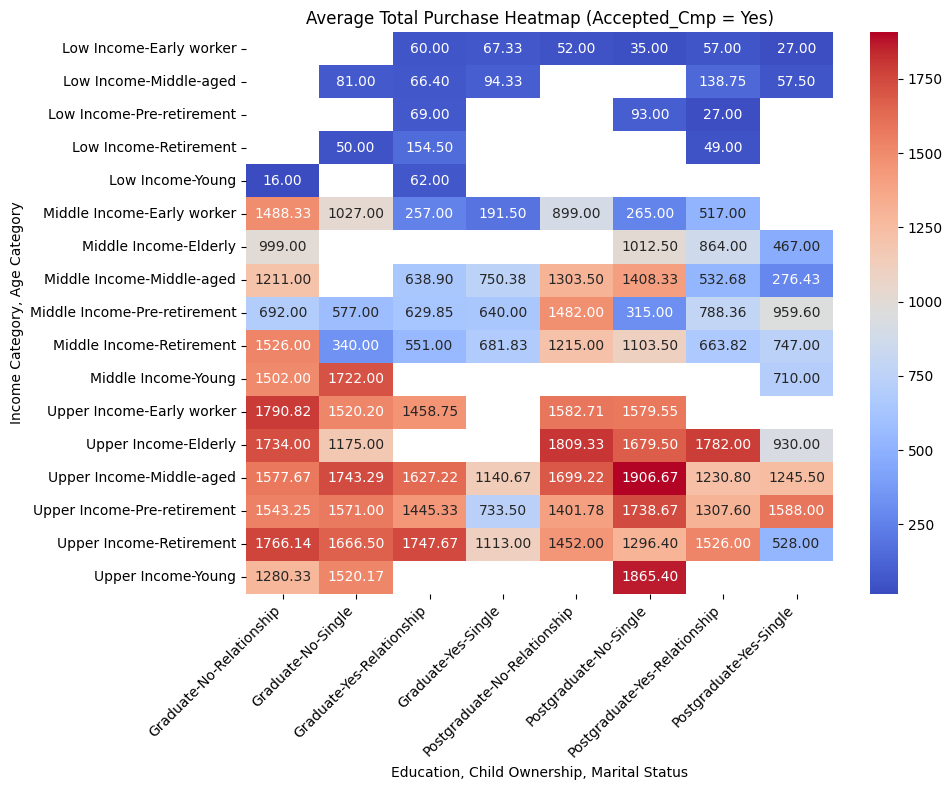

In [25]:
# Filter the data based on the "Accepted_Cmp" variable
filtered_data = df[df['Accepted_Cmp'] == 'Yes']

# Pivot the filtered data to create a table with rows as income category and age category, and columns as education, child ownership, and marital status
pivot_table = filtered_data.pivot_table(values='Total_Purchases', index=['Income_Category', 'Age_Category'], columns=['Education', 'Child', 'Marital_Status'], aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Average Total Purchase Heatmap (Accepted_Cmp = Yes)')
plt.xlabel('Education, Child Ownership, Marital Status')
plt.ylabel('Income Category, Age Category')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Insight:\
Berdasarkan heatmap diatas dapat diketahui bahwa customer dengan rata-rata total spent terbesar yaitu Custoner dengan criteria:
- age category 'Young' (15-24 Tahun), 
- income category 'Upper Income' (income > 67902), 
- child ownership 'No' atau tidak memilki anak, 
- level of education 'Postgraduate', 
- marital status 'Single'.

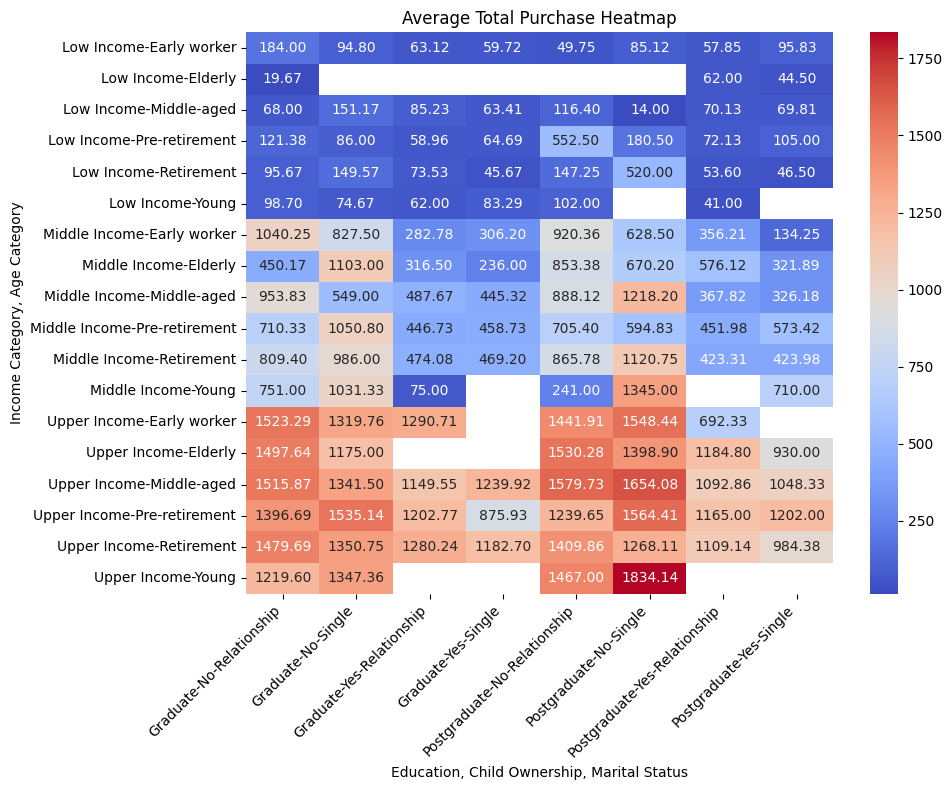

In [26]:
# Pivot the data to create a table with rows as income category and age category, and columns as education, child ownership, and marital status
pivot_table = df.pivot_table(values='Total_Purchases', index=['Income_Category', 'Age_Category'], columns=['Education', 'Child', 'Marital_Status'], aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='.2f', cbar=True)
plt.title('Average Total Purchase Heatmap')
plt.xlabel('Education, Child Ownership, Marital Status')
plt.ylabel('Income Category, Age Category')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Insight:\
Berdasarkan heatmap diatas dapat diketahui bahwa customer dengan rata-rata total spent terbesar yaitu Custoner dengan criteria:
- age category 'Young' (15-24 Tahun), 
- income category 'Upper Income' (income > 67902), 
- child ownership 'No' atau tidak memilki anak, 
- level of education 'Postgraduate', 
- marital status 'Single'.

### Kesimpulan Target Pasar

Hubungan antara insight penurunan dengan customer segmetation (target pasar):

Dari insight diatas terkait dengan customer segmentation dan penurunan total spent cutomer, dapat disimpulkan bahwa supermarket x dalam menentukan target pasar masih belum tepat karena jika dilihat dari segi rata rata total amount spent customer per year secara general mengalami penurunan dan jika kita lihat juga dari customer yang menerima campaign juga mengalmai penurunan. 

Pada periode ini, Supermarket X ini menargetkan target pasar mereka untuk yang menerima campaign yaitu pada customer sagmentation dengan criteria:
- Age category:Middle-Aged
- Income Catgeory:Upper Income
- Child Ownership:No
- Level of Education:Postgraduate 
- Marital Status:Single


Inti\
Karena saat supermarket x ini mengadakan campaign dengan target pasar seperti criteria diatas dan rata rata total spent customer menurun dari tahun ke tahun, dapat disimpulkan bahwa campaign tersebut masih belum dapat meningkatkan penjualan dari tahun ke tahun berdasarkan total spent customer dan menandakan bahwa campaign tersebut kurang efektif.

##### 2. Apa produk atau kategori produk yang paling diminati oleh customer dengan avg total purchase tertinggi? 


2. Produk

 Alasan produk mempengaruhi efektifitas campaign:\
 Produk yang ditawarkan dalam campaign harus relevan dengan kebutuhan dan keinginan target pasar. Jika produk tidak sesuai dengan apa yang diinginkan atau dibutuhkan oleh customer maka perusahaan akan kehilangan daya tarik customer terhadap pemeblian produk. Oleh karena itu, pemilihan produk yang tepat sangat penting untuk meningkatkan efektivitas campaign.


Search for products that have the highest total purchase:

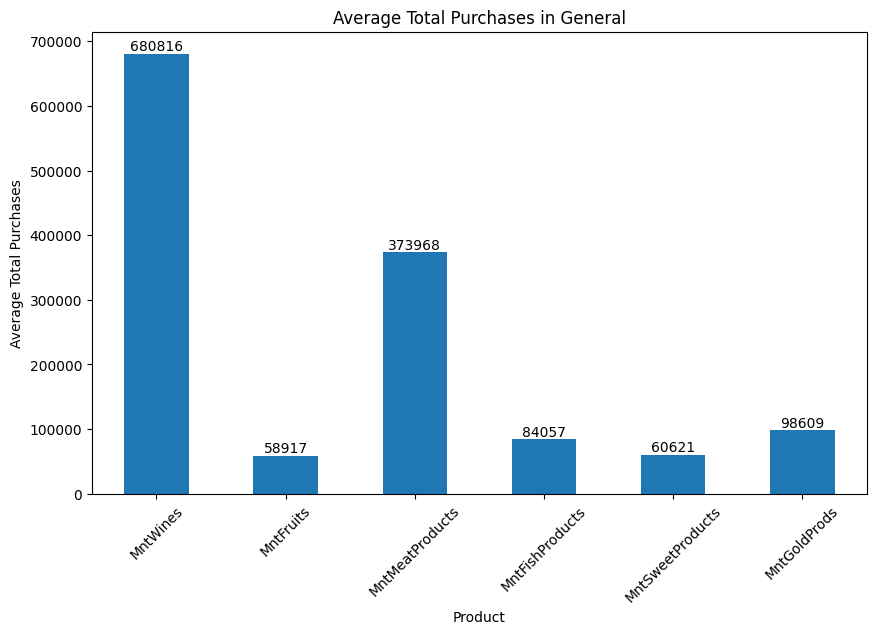

In [27]:
import matplotlib.pyplot as plt

# Calculate the mean total purchases for each variable
mean_total_purchases = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
mean_total_purchases.plot(kind='bar')
plt.title('Average Total Purchases in General')
plt.xlabel('Product')
plt.ylabel('Average Total Purchases')
plt.xticks(rotation=45)

# Add the values on each bar
for i, value in enumerate(mean_total_purchases):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

Insight:\
Secara keseluruhan customer di supermarket x mereka rata rata mengeluarkan uang untuk berbelanja produk wine dan meat saja. Dan dari segi angka antar produk memilki jarak rata rata total purchase yang tergolong jauh jika dibandingkan dengan 2 produk terlaris.

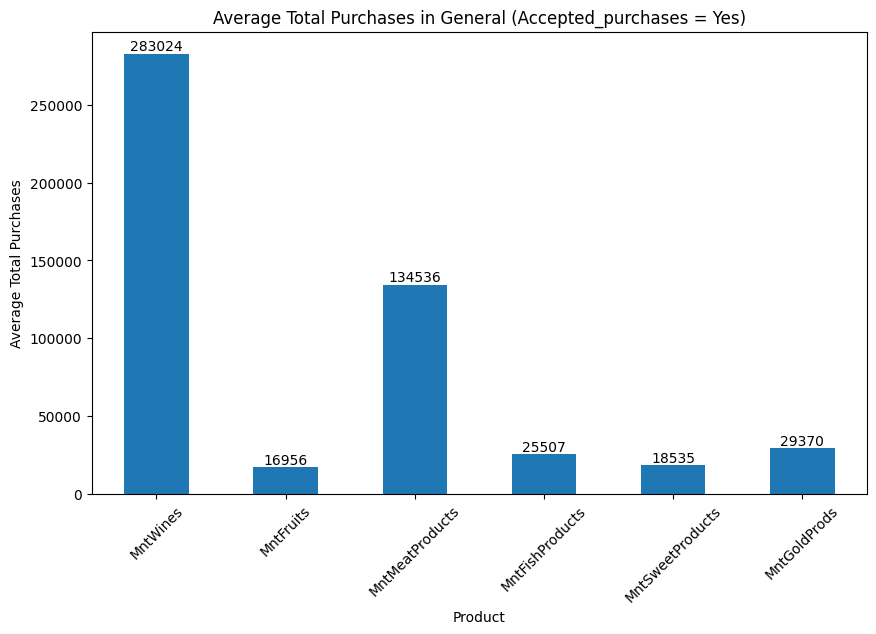

In [28]:
import matplotlib.pyplot as plt

# Filter the data based on Accepted_purchases = Yes
filtered_data = df[df['Accepted_Cmp'] == 'Yes']

# Calculate the mean total purchases for each variable
mean_total_purchases = filtered_data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum()

# Create the bar plot
plt.figure(figsize=(10, 6))
mean_total_purchases.plot(kind='bar')
plt.title('Average Total Purchases in General (Accepted_purchases = Yes)')
plt.xlabel('Product')
plt.ylabel('Average Total Purchases')
plt.xticks(rotation=45)

# Add the values on each bar
for i, value in enumerate(mean_total_purchases):
    plt.text(i, value, str(value), ha='center', va='bottom')

plt.show()

Insight:\
konusmen dengan age category 'Young' (15-24 Tahun), income category 'Upper Income' (income > 67902), child ownership 'No' atau tidak memilki anak, level of education 'Postgraduate', dan marital status 'Single'. Mereka cenderung menghabiskan lebih banyak uang untuk membeli produk Wine dan Meat.

### Kesimpulan Product:
Jika dilihat dari insight dan grafik diatas terkait dengan product dapat disimpulkan bahwa supermarket x hanya memfokuskan campign ke 2 produk teratas. Hal tersebut dapat memberikan dampak negatif terhadap penjualan karena dengan tidak memperhatikan produk lain, supermarket X mungkin melewatkan peluang penjualan yang bisa didapatkan dari produk-produk tersebut. Ada kemungkinan bahwa produk lain di dalam toko juga memiliki potensi untuk menarik minat pelanggan dan menghasilkan penjualan tambahan jika dipromosikan dengan baik

##### 3. Bagaimana faktor tersebut dapat membantu dalam mengembangkan strategi pemasaran yang lebih efektif untuk mendorong pembelian yang lebih tinggi?

`a. Target Pasar:` \
Dengan memahami hubungan karakteristik demografis dan pengeluaran konsumen, supermarket x dapat melakukan segmentasi pasar yang lebih baik. Dengan memahami karakteristik demografis konsumen yang cenderung menghabiskan lebih banyak uang, Supermarket X dapat mengembangkan campaign pemasaran yang lebih efektif agar perusahaan dapat mempengaruhi dan mendorong customer secara khusus untuk menghabiskan lebih banyak uang.

cara : Supermarket X mengidentifikasi bahwa konsumen dengan category young, Upper Income, Tidak memiliki anak, Postgraduate, dan Single memiliki kecenderungan untuk menghabiskan lebih banyak uang. Dengan begitu, Supermarket X dapat memfokuskan upaya pemasaran pada segmen ini dan menyesuaikan produk dan penawaran agar sesuai dengan preferensi dan kebutuhan khusus mereka.

`b. Produk:`\
Dengan melibatkan produk-produk yang memiliki potensi penjualan tinggi, supermarket X dapat mengembangkan campaign pemasaran yang beragam dan menarik untuk produk-produk tersebut. Kampanye yang menarik dan relevan dapat mendorong minat pelanggan dan meningkatkan kemungkinan pembelian.

### Faktor Pendukung lain Agar Strategi Pemasaran (Campaign) lebih Efektif 

Untuk pengembangan marketing campaign yang tepat sasaran dan efektif terdapat beberapa faktor pendukung:

#### 1. Apakah ada tren yang dapat diidentifikasi di antara campaign?

C:\Users\KHANZA\AppData\Local\Temp\ipykernel_23892\3573557757.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df_filtered.groupby(['Month']).sum()


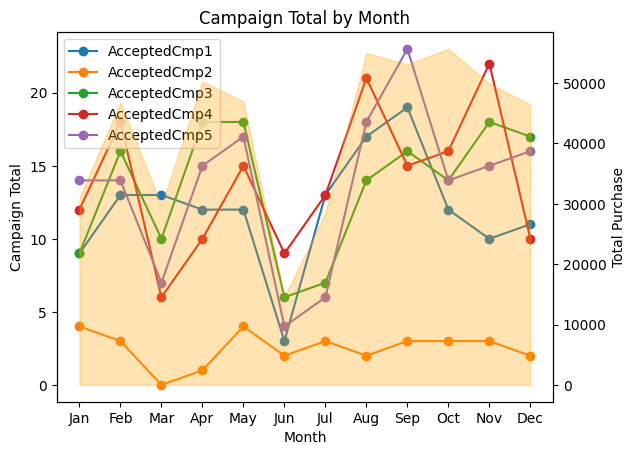

In [29]:
import matplotlib.pyplot as plt

# Mengambil data dari DataFrame df
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Month'] = df['Dt_Customer'].dt.strftime('%b')
df_filtered = df[df['Accepted_Cmp'] == 'Yes']
grouped_data = df_filtered.groupby(['Month']).sum()

# Data untuk line chart
x = grouped_data.index
x_sorted = sorted(x, key=lambda month: pd.to_datetime(month, format='%b').month)

# Membuat plot
fig, ax1 = plt.subplots()

# Membuat line chart untuk masing-masing variabel
for column in ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']:
    y = grouped_data[column]
    ax1.plot(x_sorted, y, marker='o', label=column)

ax1.set_xlabel('Month')
ax1.set_ylabel('Campaign Total')
ax1.set_title('Campaign Total by Month')
ax1.legend()

# Membuat area chart
ax2 = ax1.twinx()
ax2.fill_between(x_sorted, grouped_data['Total_Purchases'], color='orange', alpha=0.3)
ax2.set_ylabel('Total Purchase')

# Menampilkan plot
plt.show()

Kesimpulan:\
Berdasarkan grafik, terlihat bahwa fluktuasi total pengeluaran konsumen dari bulan ke bulan dipengaruhi oleh frekuensi campaign yang dilakukan. Jika campaign tersebut berhasil menarik banyak konsumen, maka jumlah pengeluaran yang dikeluarkan oleh konsumen juga cenderung meningkat. Sebaliknya, jika campaign kurang berhasil atau tidak menarik minat konsumen, maka pengeluaran konsumen cenderung menurun. Hubungan antara frekuensi campaign dan total pengeluaran konsumen merupakan indikasi adanya pengaruh saling mempengaruhi antara keduanya.

Insight:\
Jika dilihat berdasarkan tren tiap bulan, pada bulan maret, mei, agustus dan oktober memilki tingkat customer yang tinggi dalam menerima campaign sehingga pada bulan-bulan tersebut total pengeluaran cutomer juga meningkat. Tetapi pada bulan april, juni, juli, november dan desember mengalami penurunan jumlah konsumen yang menerima campaign yang menyebabkan turunya total pengeluaran customer.


#### 2. Berapa kali campaign dilakukan untuk mencapai keefektifan campaign?

C:\Users\KHANZA\AppData\Local\Temp\ipykernel_23892\250059704.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_data = df_filtered.groupby(['Month']).sum()


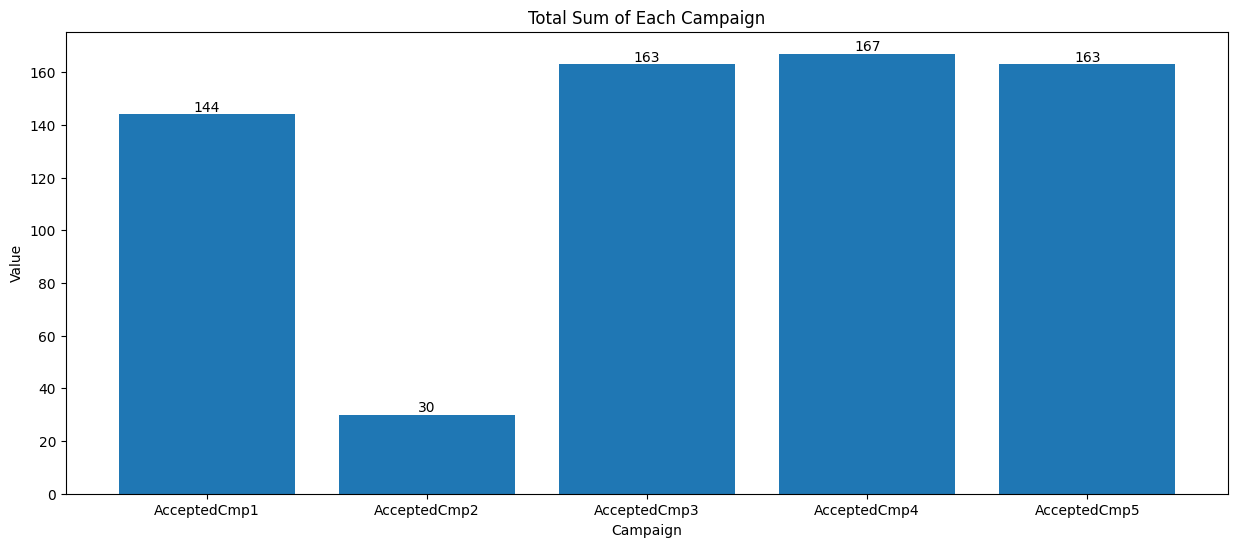

In [30]:
import matplotlib.pyplot as plt

# Mengambil data dari DataFrame df
df_filtered = df[df['Accepted_Cmp'] == 'Yes']
grouped_data = df_filtered.groupby(['Month']).sum()

# Data untuk bar plot
x = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
y = grouped_data[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

# Membuat plot
fig, ax = plt.subplots(figsize=(15, 6))

# Membuat bar plot
ax.bar(x, y)

ax.set_xlabel('Campaign')
ax.set_ylabel('Value')
ax.set_title('Total Sum of Each Campaign')

# Add the values on each bar
for i, value in enumerate(y):
    ax.text(i, value, str(value), ha='center', va='bottom')

# Menampilkan plot
plt.show()

Insight:\
Campaign efektif dilakukan sebanyak 4 kali karena pada campaign ke 5 jumlah customer yang menerima campaign menurun jika dibandingkan dengan campaign sebelumnya.

# Kesimpulan:

1. Bagaimana hubungan karakteristik demografis konsumen terhadap jumlah pengeluaran mereka? 
- Target pasar Supermarket X yang ditentukan berdasarkan customer segmentation masih belum tepat.
- Rata-rata total pembelian pelanggan secara umum mengalami penurunan, termasuk pada segmen pelanggan yang menerima campaign.
- Campaign yang dilakukan kurang efektif dalam meningkatkan penjualan berdasarkan total pembelian pelanggan.

2. Apa produk atau kategori produk yang paling diminati oleh customer dengan avg total purchase tertinggi? 
- Supermarket X hanya fokus pada dua produk teratas dalam campaign mereka.
- Hal ini dapat memiliki dampak negatif terhadap penjualan, karena peluang penjualan dari produk lain dapat terlewatkan.
- Produk lain di dalam toko juga memiliki potensi untuk menarik minat pelanggan dan menghasilkan penjualan tambahan jika dipromosikan dengan baik.

3. Bagaimana faktor tersebut dapat membantu dalam mengembangkan strategi pemasaran yang lebih efektif untuk mendorong pembelian yang lebih tinggi?
- Supermarket X dapat melakukan segmentasi pasar yang lebih baik dengan memahami hubungan karakteristik demografis dan pengeluaran konsumen.
- Mengidentifikasi segmen konsumen yang cenderung menghabiskan lebih banyak uang dan mengembangkan campaign pemasaran yang sesuai dapat meningkatkan pengaruh Supermarket X terhadap konsumen tersebut.

4. Apakah ada tren yang dapat diidentifikasi di antara campaign?
- Fluktuasi total pengeluaran konsumen dipengaruhi oleh frekuensi campaign yang dilakukan oleh Supermarket X.
- Jika campaign berhasil menarik minat konsumen, total pengeluaran cenderung meningkat, dan sebaliknya.
- Terdapat hubungan saling mempengaruhi antara frekuensi campaign dan total pengeluaran konsumen.
- Campaign efektif dilakukan hingga empat kali, setelah itu jumlah konsumen yang menerima campaign cenderung menurun.

5. Berapa kali campaign dilakukan untuk mencapai keefektifan campaign?
- campaign paling efektif dilakukan sebanyak 4 kali


# Rekomendasi:

### Untuk meningkatkan penjualan supermarket X dapat melakukan:

Untuk meningkatkan jumlah penjualan berdasarkan total pengeluaran customer, supermarket x dapat memperbanyak campaign di bulan april, juni, juli, november, dan desember dengan frekuensi pengulangan campaign sebanyak 4 kali berdasarkan customer segementation dengan criteria:
- age category 'Young' (15-24 Tahun), 
- income category 'Upper Income' (income > 67902), 
- child ownership 'No' atau tidak memilki anak, 
- level of education 'Postgraduate', 
- marital status 'Single'
karena dengan adanya campaign yang menarik dapat mempengaruhi konsumen untuk meningkatkan total pengeluaran mereka dalam satu transaksi.

Selain itu, supermarket x juga dapat mengembangkan campaign pemasaran yang beragam dan menarik untuk produk-produk tersebut. campaign yang menarik dan relevan dapat mendorong minat pelanggan dan meningkatkan kemungkinan pembelian.